In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import warnings

## Avoid printing out warnings
with warnings.catch_warnings():
     warnings.filterwarnings("ignore")
     bc = load_breast_cancer()
     X, y = bc.data, bc.target

In [21]:
# Load the dataset
bc = load_breast_cancer()
X, y = bc.data, bc.target


In [22]:
# 1. Dataset exploration
print(f"Features: {bc.feature_names}")
print(f"Target classes: {bc.target_names}")
print(f"Shape of the dataset: {X.shape}")

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target classes: ['malignant' 'benign']
Shape of the dataset: (569, 30)


In [23]:
# Convert to DataFrame for easier exploration
df = pd.DataFrame(X, columns=bc.feature_names)
df['target'] = y
print(df.head())  # Display first 5 rows of the dataset

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
# Splitting data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [27]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize weights, learning rate, threshold, and iterations
weights = np.zeros(X_train.shape[1])
learning_rate = 0.5
threshold = 0.5
iterations = 5000

# Log loss function definition
def log_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


In [28]:
losses = []

for i in range(iterations):
    # Predict probabilities
    z = np.dot(X_train, weights)
    y_pred = sigmoid(z)
    
    # Compute the gradient and update weights
    gradient = np.dot(X_train.T, (y_pred - y_train)) / len(y_train)
    weights -= learning_rate * gradient
    
    # Log the loss every 100 iterations
    if i % 100 == 0:
        loss = log_loss(y_train, y_pred)
        losses.append(loss)
        print(f"Iteration {i}: Log Loss = {loss}")

Iteration 0: Log Loss = 0.6931471805599453
Iteration 100: Log Loss = 0.0707035066703029
Iteration 200: Log Loss = 0.06094179196239977
Iteration 300: Log Loss = 0.05639722812097733
Iteration 400: Log Loss = 0.05366640748777396
Iteration 500: Log Loss = 0.051817705867832
Iteration 600: Log Loss = 0.050459489011297314
Iteration 700: Log Loss = 0.04939714408767965
Iteration 800: Log Loss = 0.048526202405583245
Iteration 900: Log Loss = 0.0477868719057437
Iteration 1000: Log Loss = 0.0471427830782058
Iteration 1100: Log Loss = 0.04657059817753649
Iteration 1200: Log Loss = 0.046054643638385656
Iteration 1300: Log Loss = 0.04558397292411787
Iteration 1400: Log Loss = 0.04515067485998655
Iteration 1500: Log Loss = 0.04474885616010229
Iteration 1600: Log Loss = 0.04437400654720803
Iteration 1700: Log Loss = 0.0440225898506647
Iteration 1800: Log Loss = 0.043691773232247856
Iteration 1900: Log Loss = 0.04337924339447835
Iteration 2000: Log Loss = 0.04308307901814455
Iteration 2100: Log Loss = 0

In [29]:
# Predict on the test set
y_pred_test_prob = sigmoid(np.dot(X_test, weights))
y_pred_test = (y_pred_test_prob >= threshold).astype(int)

# Precision, Recall, F1, Confusion Matrix
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Precision: 0.9857142857142858
Recall: 0.971830985915493
F1 Score: 0.9787234042553191
Confusion Matrix:
[[42  1]
 [ 2 69]]


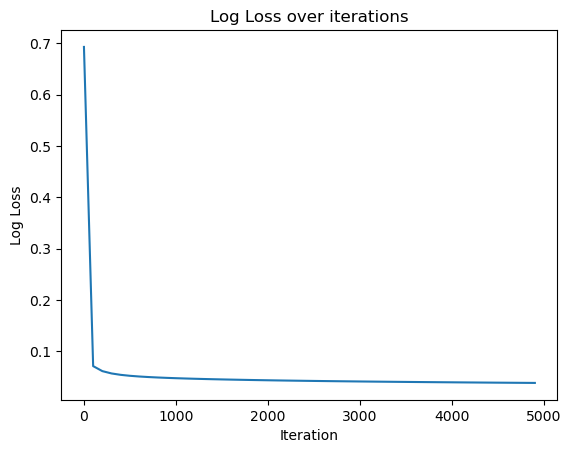

In [30]:
plt.plot(range(0, iterations, 100), losses)
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss over iterations')
plt.show()

In [31]:
print("Final weights:", weights)

Final weights: [-0.10286603  0.08372348  0.06686021 -0.18735666  0.06523462  2.28295767
 -1.43279513 -2.88225352  1.05023873 -0.53182685 -3.25754747  0.579866
 -0.5547853  -2.29714399 -0.7980657   0.53335795  1.15563112 -1.10774328
  1.31841652  1.49674949 -1.63534385 -2.94695592 -0.41404375 -1.63418242
 -0.23649271  0.10355553 -2.31455318 -1.44809793 -2.79716918 -0.00725652]
